In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("dataset.csv")
df.drop(df.iloc[: ,0:7], inplace=True, axis=1);
df.drop(df.iloc[: ,1:3], inplace=True, axis=1);
df.drop(df.iloc[: ,2:3], inplace=True, axis=1);
df.drop(df.iloc[: ,4:5], inplace=True, axis=1);
df.drop(df.iloc[: ,5:7], inplace=True, axis=1);
df['Market'].unique()

array(['US', 'APAC', 'EU', 'Africa', 'EMEA', 'LATAM', 'Canada'],
      dtype=object)

In [3]:
df.describe(include = 'all')

,Segment,Country,Market,Region,Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
count,51290,51290,51290,51290,51290,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
unique,3,147,7,13,3,NaN,NaN,NaN,NaN,NaN,NaN
top,Consumer,United States,APAC,Central,Office Supplies,NaN,NaN,NaN,NaN,NaN,NaN
freq,26518,9994,11002,11117,31273,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,246.490581,3.476545,0.142908,28.610982,26.375818,1.204143
std,NaN,NaN,NaN,NaN,NaN,487.565361,2.278766,0.212280,174.340972,57.296810,0.349801
min,NaN,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000,0.002000,0.500000
25%,NaN,NaN,NaN,NaN,NaN,30.758625,2.000000,0.000000,0.000000,2.610000,1.000000
50%,NaN,NaN,NaN,NaN,NaN,85.053000,3.000000,0.000000,9.240000,7.790000,1.000000
75%,NaN,NaN,NaN,NaN,NaN,251.053200,5.000000,0.200000,36.810000,24.450000,1.500000


In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
le = LabelEncoder()

In [6]:
df.Segment = le.fit_transform(df.Segment)
df.Country = le.fit_transform(df.Country)
df.Market = le.fit_transform(df.Market)
df.Region = le.fit_transform(df.Region)
df.Category = le.fit_transform(df.Category)

In [7]:
df.Market = df.Market.astype('category')
df.Segment = df.Segment.astype('category')
df.Region = df.Region.astype('category')
df.Country = df.Country.astype('category')
df.Category = df.Category.astype('category')

In [8]:
df.describe(include = 'all')

,Segment,Country,Market,Region,Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
count,51290.0,51290.0,51290.0,51290.0,51290.0,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
unique,3.0,147.0,7.0,13.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
top,0.0,139.0,0.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
freq,26518.0,9994.0,11002.0,11117.0,31273.0,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,246.490581,3.476545,0.142908,28.610982,26.375818,1.204143
std,NaN,NaN,NaN,NaN,NaN,487.565361,2.278766,0.212280,174.340972,57.296810,0.349801
min,NaN,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000,0.002000,0.500000
25%,NaN,NaN,NaN,NaN,NaN,30.758625,2.000000,0.000000,0.000000,2.610000,1.000000
50%,NaN,NaN,NaN,NaN,NaN,85.053000,3.000000,0.000000,9.240000,7.790000,1.000000
75%,NaN,NaN,NaN,NaN,NaN,251.053200,5.000000,0.200000,36.810000,24.450000,1.500000


In [9]:
df['Market'].unique()

[6, 0, 4, 1, 3, 5, 2]
Categories (7, int64): [0, 1, 2, 3, 4, 5, 6]

In [10]:
%matplotlib inline

In [11]:
import matplotlib.pyplot as plt

array([[<AxesSubplot: title={'center': 'Sales'}>,
        <AxesSubplot: title={'center': 'Quantity'}>],
       [<AxesSubplot: title={'center': 'Discount'}>,
        <AxesSubplot: title={'center': 'Profit'}>],
       [<AxesSubplot: title={'center': 'Shipping Cost'}>,
        <AxesSubplot: title={'center': 'Order Priority'}>]], dtype=object)

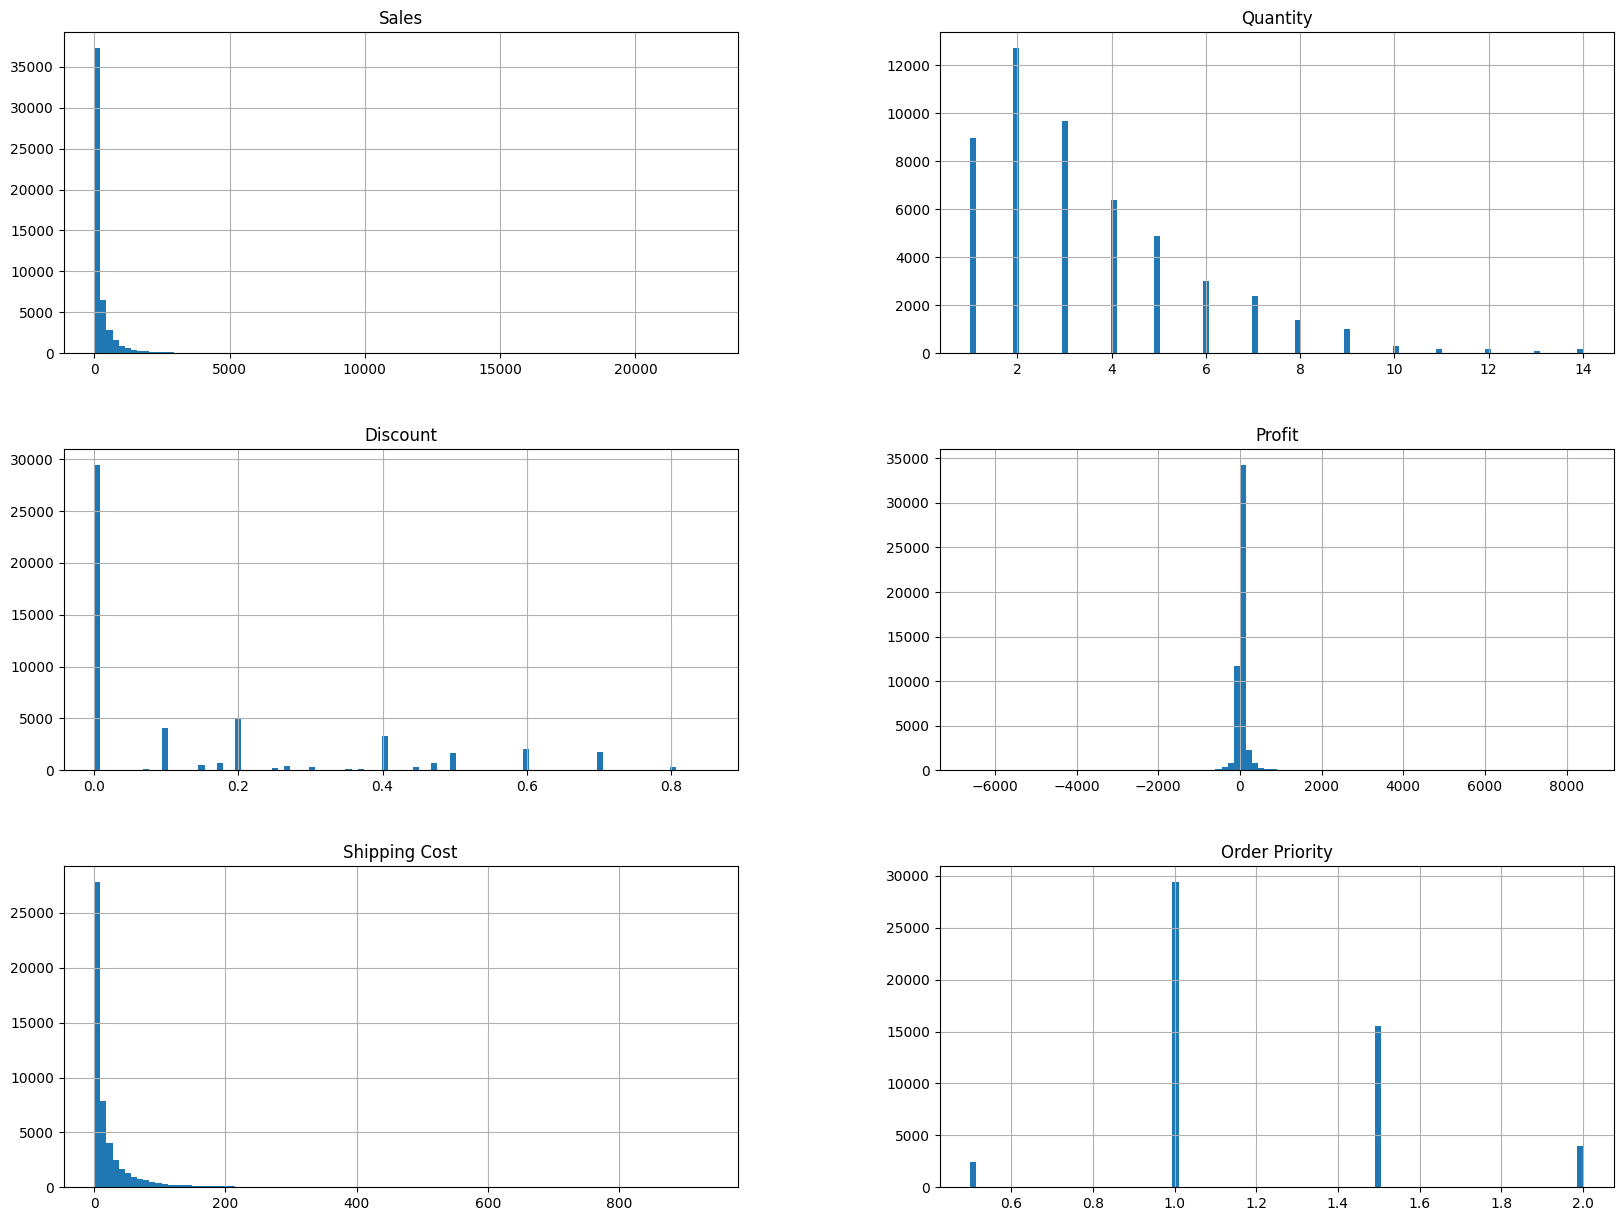

In [12]:
df.hist(bins = 100, figsize=(20,15))

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
train_set, test_set = train_test_split(df, test_size=0.3, random_state=42)

In [15]:
train_set.head()

,Segment,Country,Market,Region,Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
49139,0,22,2,1,1,26.40,1,0.0,13.20,0.530,1.0
44493,1,27,5,10,1,27.36,3,0.0,5.46,1.326,1.0
5219,1,57,0,4,2,334.68,4,0.0,83.64,63.870,1.5
45449,0,22,2,1,1,19.56,4,0.0,4.68,1.160,1.0
31015,1,32,1,0,1,17.88,1,0.0,6.06,5.060,2.0


In [16]:
df = train_set

In [17]:
df.describe()

,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
count,35903.000000,35903.000000,35903.000000,35903.000000,35903.000000,35903.000000
mean,244.514027,3.471799,0.142760,28.862488,26.157820,1.202769
std,481.137449,2.280551,0.212486,177.594615,57.091563,0.348638
min,0.556000,1.000000,0.000000,-4088.376000,0.002000,0.500000
25%,30.564000,2.000000,0.000000,0.000000,2.600000,1.000000
50%,84.800000,3.000000,0.000000,9.300000,7.799000,1.000000
75%,249.090000,5.000000,0.200000,36.761500,24.257000,1.500000
max,17499.950000,14.000000,0.800000,8399.976000,933.570000,2.000000


In [18]:
corr_matrix = df.corr(method='pearson', min_periods=1, numeric_only=0)

In [19]:
corr_matrix["Profit"].sort_values(ascending=False)

Profit            1.000000
Sales             0.532233
Shipping Cost     0.371564
Quantity          0.104063
Category          0.067784
Region            0.003625
Segment           0.000237
Order Priority   -0.000402
Market           -0.017661
Country          -0.052320
Discount         -0.311470
Name: Profit, dtype: float64

In [20]:
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(strategy="median")
# imputer.fit(df)

In [21]:
df.describe( include ='all')

,Segment,Country,Market,Region,Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
count,35903.0,35903.0,35903.0,35903.0,35903.0,35903.000000,35903.000000,35903.000000,35903.000000,35903.000000,35903.000000
unique,3.0,146.0,7.0,13.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
top,0.0,139.0,0.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
freq,18600.0,6995.0,7687.0,7729.0,21913.0,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,244.514027,3.471799,0.142760,28.862488,26.157820,1.202769
std,NaN,NaN,NaN,NaN,NaN,481.137449,2.280551,0.212486,177.594615,57.091563,0.348638
min,NaN,NaN,NaN,NaN,NaN,0.556000,1.000000,0.000000,-4088.376000,0.002000,0.500000
25%,NaN,NaN,NaN,NaN,NaN,30.564000,2.000000,0.000000,0.000000,2.600000,1.000000
50%,NaN,NaN,NaN,NaN,NaN,84.800000,3.000000,0.000000,9.300000,7.799000,1.000000
75%,NaN,NaN,NaN,NaN,NaN,249.090000,5.000000,0.200000,36.761500,24.257000,1.500000


In [22]:
df_pr = df[['Profit' ,'Sales', 'Country', 'Region']]

In [23]:
df_pr.describe(include = 'all')

,Profit,Sales,Country,Region
count,35903.000000,35903.000000,35903.0,35903.0
unique,NaN,NaN,146.0,13.0
top,NaN,NaN,139.0,3.0
freq,NaN,NaN,6995.0,7729.0
mean,28.862488,244.514027,NaN,NaN
std,177.594615,481.137449,NaN,NaN
min,-4088.376000,0.556000,NaN,NaN
25%,0.000000,30.564000,NaN,NaN
50%,9.300000,84.800000,NaN,NaN
75%,36.761500,249.090000,NaN,NaN


In [24]:
df.drop(['Profit' ,'Sales', 'Country', 'Region'], axis=1,inplace = True)

In [25]:
df.describe( include ='all')

,Segment,Market,Category,Quantity,Discount,Shipping Cost,Order Priority
count,35903.0,35903.0,35903.0,35903.000000,35903.000000,35903.000000,35903.000000
unique,3.0,7.0,3.0,NaN,NaN,NaN,NaN
top,0.0,0.0,1.0,NaN,NaN,NaN,NaN
freq,18600.0,7687.0,21913.0,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,3.471799,0.142760,26.157820,1.202769
std,NaN,NaN,NaN,2.280551,0.212486,57.091563,0.348638
min,NaN,NaN,NaN,1.000000,0.000000,0.002000,0.500000
25%,NaN,NaN,NaN,2.000000,0.000000,2.600000,1.000000
50%,NaN,NaN,NaN,3.000000,0.000000,7.799000,1.000000
75%,NaN,NaN,NaN,5.000000,0.200000,24.257000,1.500000


In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
])

In [27]:
num_tr = my_pipeline.fit_transform(df)
num_tr

array([[-0.86634249, -0.60890124, -0.00562216, ..., -0.67186289,
        -0.44889604, -0.58160933],
       [ 0.44270572,  0.74346068, -0.00562216, ..., -0.67186289,
        -0.43495333, -0.58160933],
       [ 0.44270572, -1.51047585,  1.59638103, ..., -0.67186289,
         0.66056529,  0.85256098],
       ...,
       [-0.86634249, -1.51047585, -0.00562216, ..., -0.67186289,
        -0.41106156, -0.58160933],
       [-0.86634249,  0.74346068,  1.59638103, ..., -0.66245038,
         3.38715322,  2.28673128],
       [-0.86634249,  0.29267337,  1.59638103, ..., -0.67186289,
        -0.13763731,  0.85256098]])

In [28]:
# from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
# from sklearn.tree import DecisionTreeRegressor

# model = LinearRegression();
model = RandomForestRegressor()
# model = DecisionTreeRegressor()
model.fit(num_tr,df_pr)

RandomForestRegressor()

In [29]:
df.describe(include="all")

,Segment,Market,Category,Quantity,Discount,Shipping Cost,Order Priority
count,35903.0,35903.0,35903.0,35903.000000,35903.000000,35903.000000,35903.000000
unique,3.0,7.0,3.0,NaN,NaN,NaN,NaN
top,0.0,0.0,1.0,NaN,NaN,NaN,NaN
freq,18600.0,7687.0,21913.0,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,3.471799,0.142760,26.157820,1.202769
std,NaN,NaN,NaN,2.280551,0.212486,57.091563,0.348638
min,NaN,NaN,NaN,1.000000,0.000000,0.002000,0.500000
25%,NaN,NaN,NaN,2.000000,0.000000,2.600000,1.000000
50%,NaN,NaN,NaN,3.000000,0.000000,7.799000,1.000000
75%,NaN,NaN,NaN,5.000000,0.200000,24.257000,1.500000


In [30]:
some_data = df.iloc[:5]
some_data

,Segment,Market,Category,Quantity,Discount,Shipping Cost,Order Priority
49139,0,2,1,1,0.0,0.530,1.0
44493,1,5,1,3,0.0,1.326,1.0
5219,1,0,2,4,0.0,63.870,1.5
45449,0,2,1,4,0.0,1.160,1.0
31015,1,1,1,1,0.0,5.060,2.0


In [31]:
some_labels = df_pr.iloc[:5]
some_labels

,Profit,Sales,Country,Region
49139,13.20,26.40,22,1
44493,5.46,27.36,27,10
5219,83.64,334.68,57,4
45449,4.68,19.56,22,1
31015,6.06,17.88,32,0


In [32]:
prepared_data = my_pipeline.transform(some_data)

In [33]:
prepared_data

array([[-0.86634249, -0.60890124, -0.00562216, -1.08387547, -0.67186289,
        -0.44889604, -0.58160933],
       [ 0.44270572,  0.74346068, -0.00562216, -0.20688226, -0.67186289,
        -0.43495333, -0.58160933],
       [ 0.44270572, -1.51047585,  1.59638103,  0.23161434, -0.67186289,
         0.66056529,  0.85256098],
       [-0.86634249, -0.60890124, -0.00562216,  0.23161434, -0.67186289,
        -0.43786098, -0.58160933],
       [ 0.44270572, -1.05968854, -0.00562216, -1.08387547, -0.67186289,
        -0.36954871,  2.28673128]])

In [34]:
model.predict(prepared_data)

array([[  9.4398  ,  20.0313  ,  22.      ,   1.      ],
       [  5.6798  ,  25.5502  ,  35.27    ,   8.63    ],
       [111.34503 , 425.016966,  61.33    ,   4.2     ],
       [  5.4951  ,  21.8082  ,  34.49    ,   1.71    ],
       [  6.0249  ,  21.2061  ,  46.33    ,   0.53    ]])

In [35]:
some_labels

,Profit,Sales,Country,Region
49139,13.20,26.40,22,1
44493,5.46,27.36,27,10
5219,83.64,334.68,57,4
45449,4.68,19.56,22,1
31015,6.06,17.88,32,0


In [36]:
from sklearn.metrics import mean_squared_error
store_predictions = model.predict(num_tr)
mse = mean_squared_error(df_pr, store_predictions)
rmse = np.sqrt(mse)

In [37]:
rmse

53.81941449151493

In [38]:
# from sklearn.model_selection import cross_val_score
# scores = cross_val_score(model, num_tr, df_pr, scoring="neg_mean_squared_error", cv=8)
# rmse_scores = np.sqrt(-scores)

In [39]:
# def print_scores(scores):
#     print("Scores:", scores)
#     print("Mean: ", scores.mean())
#     print("Standard deviation: ", scores.std())

In [40]:
# print_scores(scores)

In [41]:
test_set.describe(include = 'all')
Y_test = test_set[['Profit' ,'Sales', 'Country', 'Region']]
Y_test

,Profit,Sales,Country,Region
49728,-1.2720,5.8680,54,3
45547,3.6288,10.3680,139,3
15664,126.4800,269.2200,124,3
40561,4.3176,43.1760,139,12
49426,-0.7680,5.7120,97,3
...,...,...,...,...
18104,13.8600,107.1000,10,4
15146,33.7770,75.0600,139,6
38007,5.5200,39.6000,38,3
18486,57.2400,286.3200,26,8


In [42]:
test_set.drop(['Profit' ,'Sales', 'Country', 'Region'], axis=1,inplace = True)

X_test_prepared = my_pipeline.transform(test_set)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_predictions, list(Y_test))

[[ -2.61672     10.36848     60.42         3.3       ]
 [  2.2785372    7.79421333 139.           4.        ]
 [ 34.86312    184.95972     95.25         6.08      ]
 ...
 [  3.06228     20.90668     34.37         3.64      ]
 [ 49.40591    234.96951     51.48         6.22      ]
 [-63.268514   602.592056    83.74         7.27      ]] ['Profit', 'Sales', 'Country', 'Region']


In [43]:
final_rmse

161.36808694066522

In [44]:
from joblib import dump, load
dump(model, 'SalesPredictor.joblib') 